In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer


In [2]:
file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx' 
waste_data = pd.read_excel(file_path)


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\athar\AppData\Local\Temp\ipykernel_18440\2033229203.py:1: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx'


In [3]:
waste_data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [4]:
print("Initial Data Overview:")
print(waste_data.info())
print(waste_data.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sensor_id            20000 non-null  int64         
 1   timestamp            20000 non-null  datetime64[ns]
 2   waste_type           20000 non-null  object        
 3   inductive_property   20000 non-null  float64       
 4   capacitive_property  20000 non-null  float64       
 5   moisture_property    20000 non-null  float64       
 6   infrared_property    20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
   sensor_id           timestamp      waste_type  inductive_property  \
0          3 2023-09-01 12:00:00  non_recyclable                0.90   
1          4 2023-09-01 12:15:00      recyclable                1.18   
2          3 2023-09-01 12:30:00  non_recyclable      

In [6]:
data = waste_data.dropna()

In [ ]:
label_encoder = LabelEncoder()
data['waste_type'] = label_encoder.fit_transform(data['waste_type'])

In [8]:
data = data.drop('timestamp', axis=1)

In [9]:
data

,sensor_id,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,0,0.90,0.12,0.47,16.27
1,4,2,1.18,0.66,0.33,36.00
2,3,0,0.87,0.14,0.83,58.89
3,2,1,1.00,0.37,0.52,91.80
4,3,2,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...
19995,4,0,1.30,0.41,0.46,58.57
19996,4,0,0.68,0.87,0.71,12.00
19997,3,0,1.12,0.79,0.07,29.03
19998,2,1,1.18,0.05,0.05,40.17


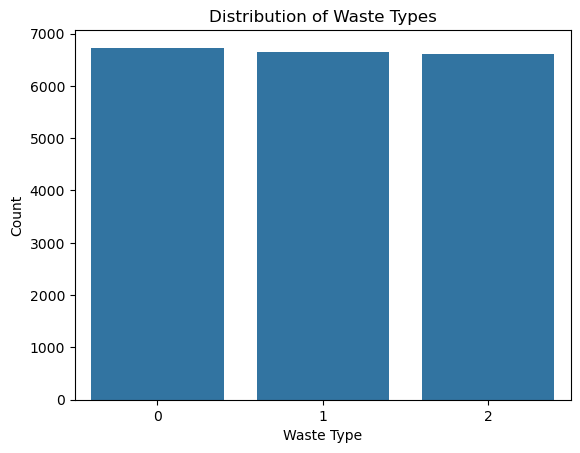

In [10]:
sns.countplot(x='waste_type', data=data)
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Count')
plt.show()

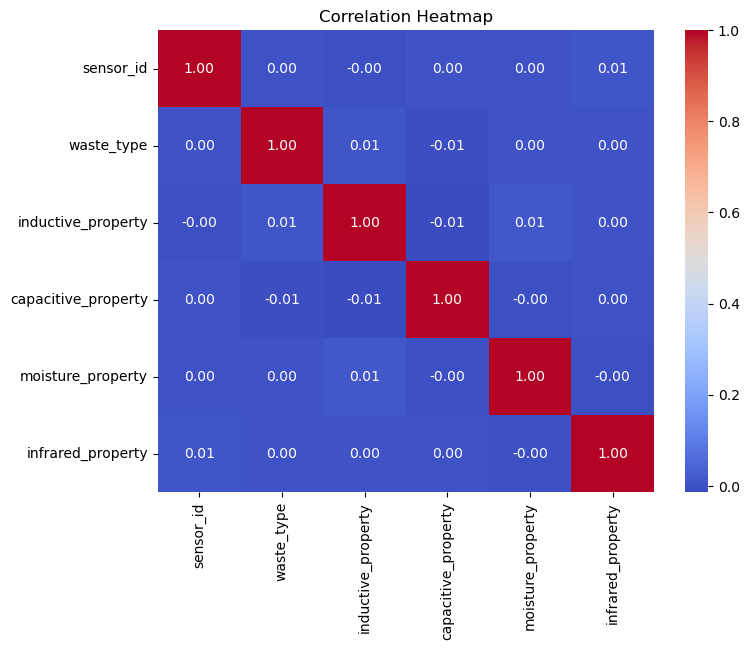

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

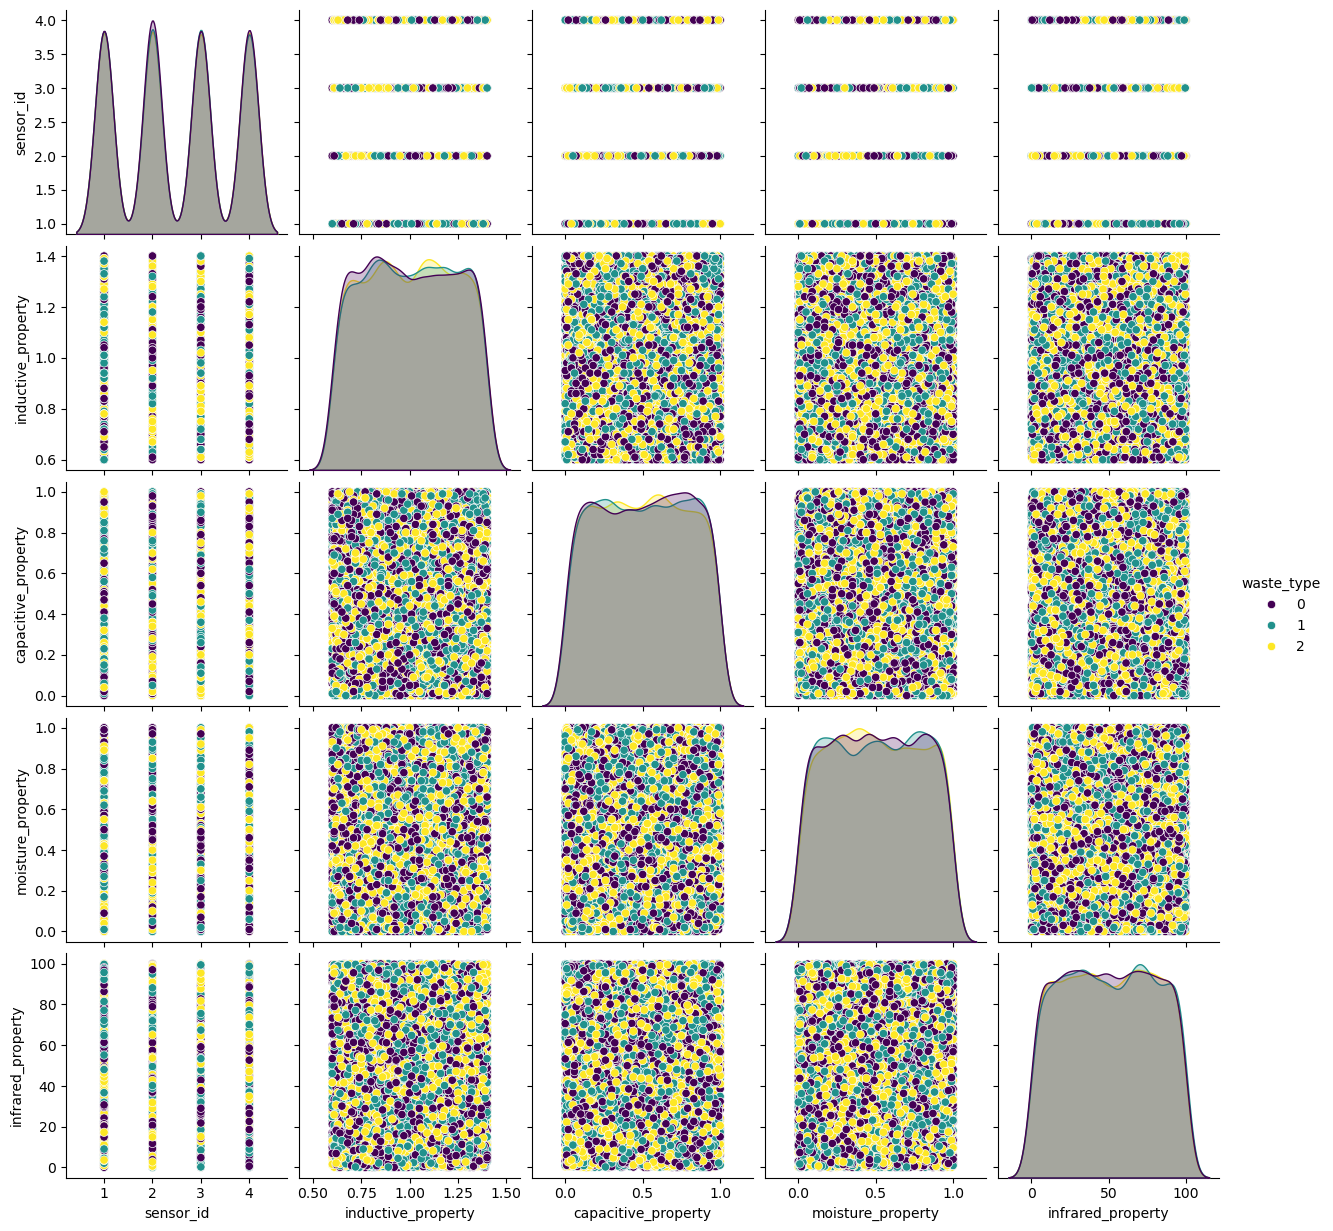

In [12]:
sns.pairplot(data, hue='waste_type', palette='viridis')
plt.show()

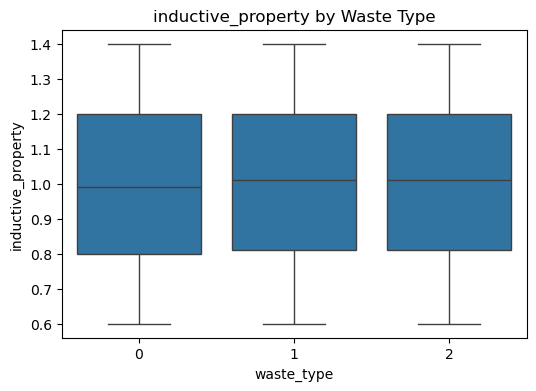

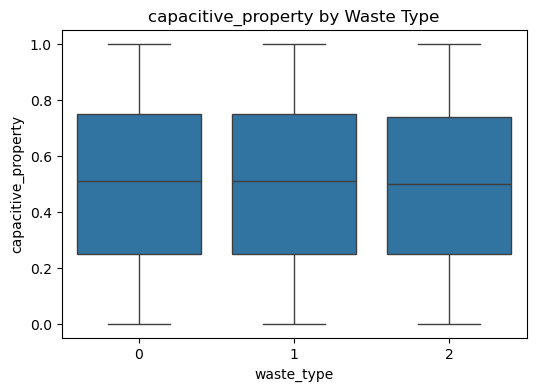

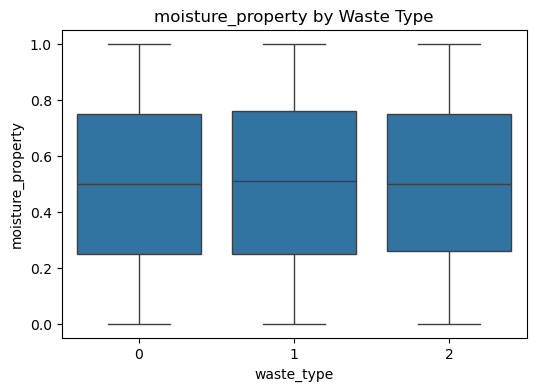

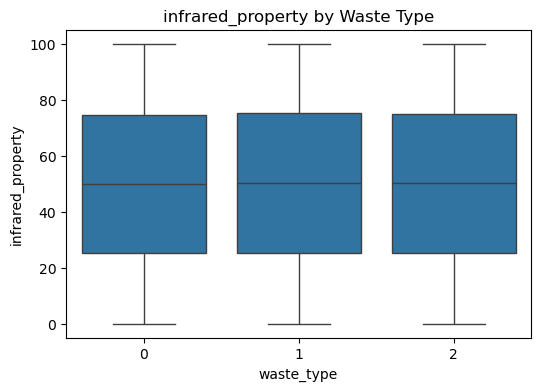

In [13]:
for feature in ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='waste_type', y=feature, data=data)
    plt.title(f'{feature} by Waste Type')
    plt.show()    

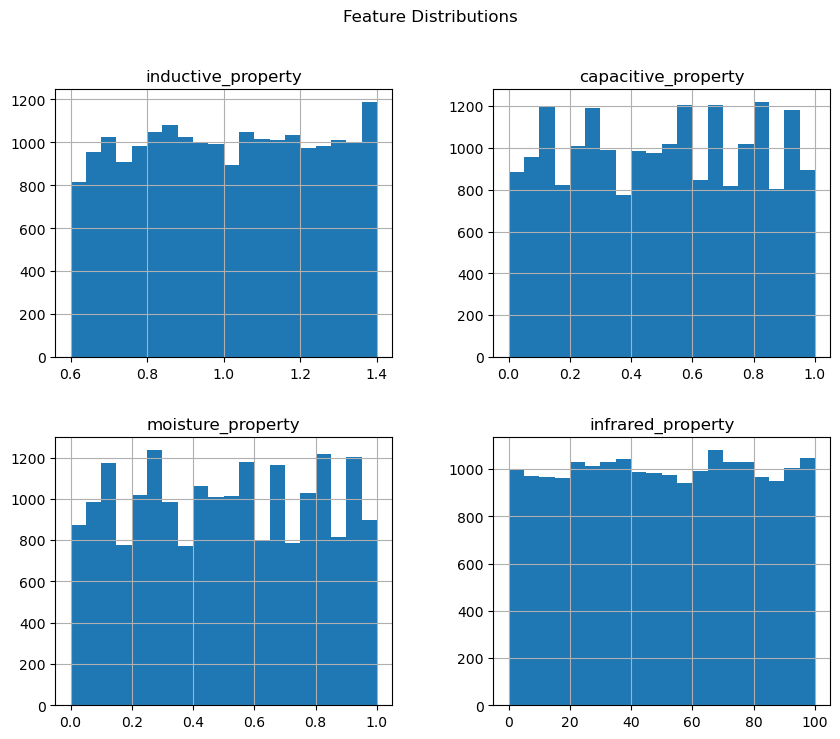

In [14]:
data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']].hist(figsize=(10, 8), bins=20)
plt.suptitle('Features Dist')
plt.show()

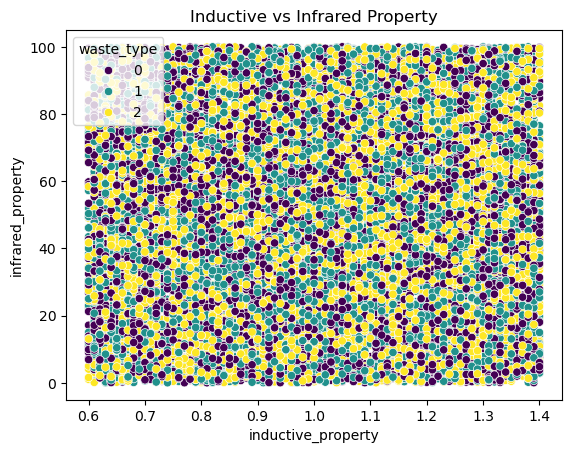

In [15]:
sns.scatterplot(x='inductive_property', y='infrared_property', hue='waste_type', data=data, palette='viridis')
plt.title('Inductive vs Infrared Property')
plt.show()

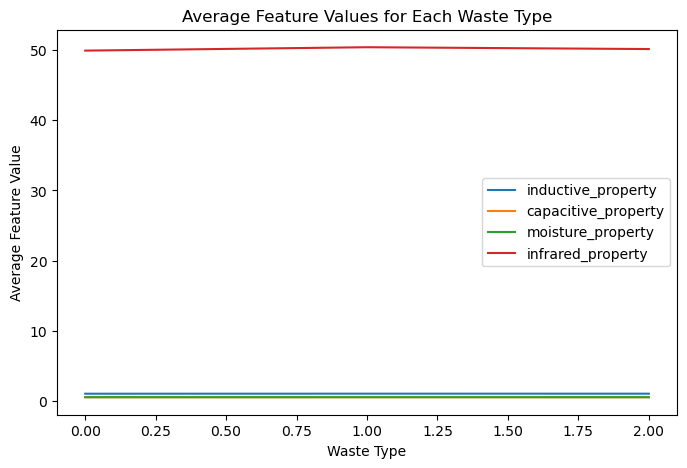

In [18]:
grouped_data = data.groupby('waste_type').mean()

plt.figure(figsize=(8, 5))
for feature in ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']:
    plt.plot(grouped_data.index, grouped_data[feature], label=feature)

plt.title('Average Feature Values for Each Waste Types')
plt.xlabel('Waste Types')
plt.ylabel('Average Feature Values')
plt.legend()
plt.show()

In [19]:
X = data.drop('waste_type', axis=1)  # Features
y = data['waste_type']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.31983333333333336
Confusion Matrix:
[[690 670 651]
 [728 603 686]
 [660 686 626]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.34      0.34      2011
           1       0.31      0.30      0.30      2017
           2       0.32      0.32      0.32      1972

    accuracy                           0.32      6000
   macro avg       0.32      0.32      0.32      6000
weighted avg       0.32      0.32      0.32      6000



In [22]:
data['waste_type'].value_counts()

waste_type
0    6729
1    6653
2    6618
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [25]:
data['interaction1'] = data['inductive_property'] * data['capacitive_property']
data['interaction2'] = data['moisture_property'] / (data['infrared_property'] + 1e-5)


In [26]:
from sklearn.feature_selection import RFE

selector = RFE(RandomForestClassifier(), n_features_to_select=3)
selector.fit(X_train, y_train)
print("Selected Features:", X.columns[selector.support_])

Selected Features: Index(['capacitive_property', 'moisture_property', 'infrared_property'], dtype='object')


In [27]:
X_selected = X[['capacitive_property', 'moisture_property', 'infrared_property']]

# Train-test split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)

# Evaluate
y_pred = rf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.328
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33      2011
           1       0.33      0.33      0.33      2017
           2       0.32      0.32      0.32      1972

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_selected)
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with Best Model: 0.328
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.35      0.34      2011
           1       0.33      0.29      0.31      2017
           2       0.32      0.34      0.33      1972

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000



In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Selecting features for training
X_selected = X[['capacitive_property', 'moisture_property', 'infrared_property']]
y = data['waste_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [31]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.3305
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34      2011
           1       0.32      0.32      0.32      2017
           2       0.33      0.34      0.34      1972

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000

